
# Recipes_zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Advanced Analytics/recipes.zip"

Streaming output truncated to the last 5000 lines.
  inflating: recipes/CMP9pRdlUG5.png  
 extracting: recipes/CMP9PZBrEJF.png  
 extracting: recipes/CMP9qQGsFkd.png  
 extracting: recipes/CMP9qYPMu9O.png  
 extracting: recipes/CMP9SLYjQT_.png  
 extracting: recipes/CMP9waRM1iZ.png  
  inflating: recipes/CMP9X1bFTM9.png  
 extracting: recipes/CMP9xOLFjts.png  
 extracting: recipes/CMp9yPnsHZf.png  
 extracting: recipes/CMP9zQChPIP.png  
 extracting: recipes/CMPA1ZSnMDd.png  
 extracting: recipes/CMPA3F4AInK.png  
 extracting: recipes/CMPA3MAnzFy.png  
  inflating: recipes/CMPA3S5F060.png  
 extracting: recipes/CMPA7K5Dj3t.png  
  inflating: recipes/CMPA82JnZzk.png  
 extracting: recipes/CMPA971HyK7.png  
 extracting: recipes/CMPAaKcMtj7.png  
 extracting: recipes/CMPAAqRJd5F.png  
 extracting: recipes/CMPABvBJcyc.png  
 extracting: recipes/CMPAdHbhWKA.png  
 extracting: recipes/CMPADIhgAYo.png  
 extracting: recipes/CMPAF7-gMkR.png  
 extracting: recipes/CMPAh2sFM4V.png  
  inflating: 

# Image Quality Assessment

Calculates the quality score for the image and store it in a dataframe. The lowest score represents the highest quality image and viceversa. For instance, a score of 90 means the images is of poor quality. 

In [ ]:
!pip install image-quality

In [ ]:
#Libraries to import
import glob
import imquality.brisque as brisque
import PIL.Image
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import skimage.io
import skimage.transform
from IPython.display import HTML
import base64

In [ ]:
# Load the images in a file
pngfiles = []
for file in glob.glob('recipes/*.png'):
  pngfiles.append(file)


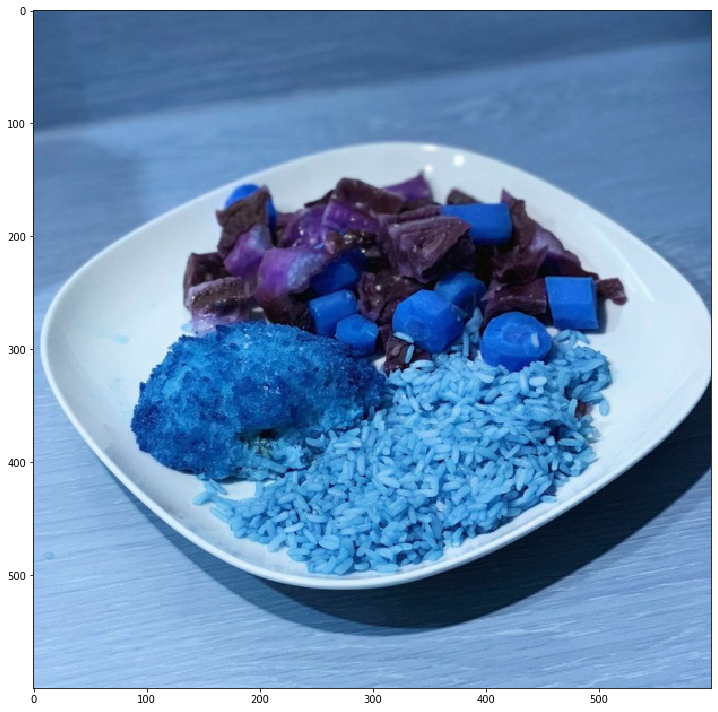

In [ ]:
# Plot image
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,10
col = cv2.imread(pngfiles[2])
gray_image = skimage.color.rgb2gray(col)
_ = skimage.io.imshow(col)

In [ ]:
# removing an image - corrupt
pngfiles.remove('recipes/CMmV2A2sBvY.png')

In [ ]:
# calculating image score
results = []
for i in pngfiles:
  img = PIL.Image.open(i)
  score = brisque.score(img)
  results.append((score,i))


In [ ]:
# storing results in dataframe
quality_score = sorted(results,key = lambda x: x[0],reverse = True)
quality_score_data = pd.DataFrame(quality_score)
quality_score_data.columns = ['image_score','image_name']
quality_score_data.head()

,image_score,image_name
0,45.021769,recipes/CMbxlmjlka4.png
1,39.993694,recipes/CMhj_xuh39M.png
2,37.486472,recipes/CMMzd4bAToY.png
3,23.682979,recipes/CMQHil2hba9.png
4,20.965384,recipes/CMNYvNGBcpY.png


In [ ]:
# downloading the file
def create_download_link(data,title = "Download CSV file",filename = "data.csv"):
  csv = data.to_csv()
  b64 = base64.b64encode(csv.encode())
  payload = b64.decode()
  html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
  html = html.format(payload = payload,title = title, filename = filename)
  return HTML(html)

create_download_link(quality_score_data)